         Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-23  Afghanistan          0          0       0
2  2020-01-24  Afghanistan          0          0       0
3  2020-01-25  Afghanistan          0          0       0
4  2020-01-26  Afghanistan          0          0       0


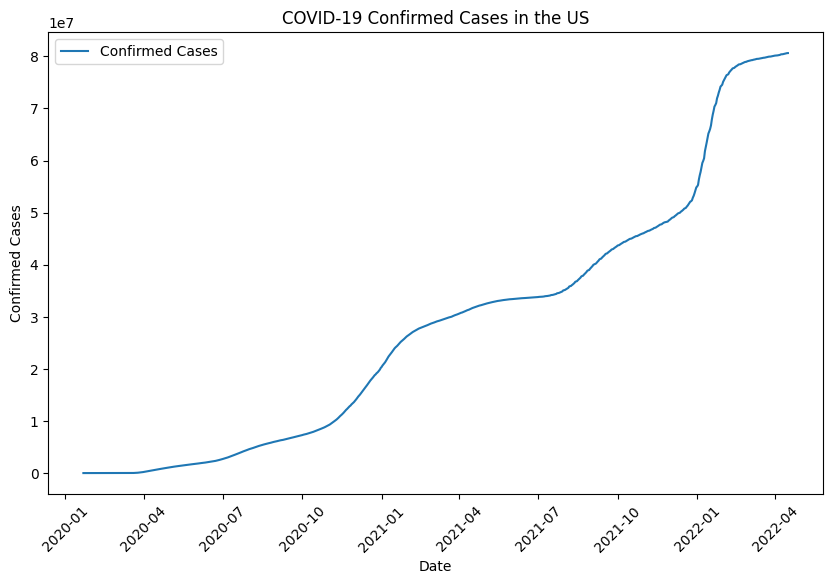

ADF Statistic: 0.577730
p-value: 0.987054
Critical Values:
	1%: -3.4386126789104074
	5%: -2.865186972298872
	10%: -2.5687119871327146

The data is likely non-stationary (p-value >= 0.05).


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Step 1: Import the data from GitHub
# Let's use a sample COVID-19 dataset available on GitHub
url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'

# Load the data into a DataFrame
df = pd.read_csv(url)

# Step 2: Check the structure of the data
print(df.head())  # Look at the first few rows to understand the structure

# We can filter for a specific country, e.g., 'US' for United States
df_country = df[df['Country'] == 'US']

# Step 3: Visualize the time series for confirmed COVID cases in the US
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_country['Date']), df_country['Confirmed'], label='Confirmed Cases')
plt.title('COVID-19 Confirmed Cases in the US')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Step 4: Perform Augmented Dickey-Fuller (ADF) Test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

    # Interpret the result
    if result[1] < 0.05:
        print("\nThe data is likely stationary (p-value < 0.05).")
    else:
        print("\nThe data is likely non-stationary (p-value >= 0.05).")

# Run ADF test on the 'Confirmed' cases in the US
adf_test(df_country['Confirmed'])